### Classificação de dígitos manuscritos

O objetivo principal do notebook é trabalhar a classificação de dígitos manuscritos. A base conta com 60 mil exemplos de treino e 10 mil exemplos de teste. 

Para a classificação, utilizou-se Deep Learning.

#### Importação das bibliotecas

In [3]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

#### Importação da base de dados

Text(0.5, 1.0, '0')

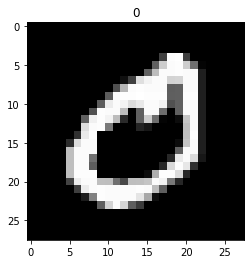

In [12]:
#obtenção dos dados e divisão automática entre treinamento e teste
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

#Visualização de imagens específicas
plt.imshow(X_treinamento[21], cmap='gray')
plt.title(y_treinamento[21])

#### Tratamento dos dados

In [13]:
#Mudança de dimensão, precisamos de um vetor 784
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))

In [14]:
#Transformação dos dados para float
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [15]:
#Normalização (255 pois é o valor máximo de 1 pixel)
X_treinamento /= 255
X_teste /= 255

In [16]:
#Transformação para o formato dummy pois temos 10 classes diferentes
y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)

#### Criação do modelo

In [19]:
#estrutura da rede neural: 784 - 64 - 64 - 10
#dropout = zerar a porcentagem dos neurônios para evitar o overfitting
modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim=784)) #relu muito usado para processamento de imagens
modelo.add(Dropout(0.2)) #20% das ligações serão zeradas
modelo.add(Dense(units=64, activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units=64, activation='relu'))
modelo.add(Dropout(0.2))

#camada de saída, softmax probabilidade
modelo.add(Dense(units=10, activation='softmax'))

In [20]:
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 10)               

In [22]:
#Configuração dos parâmetros da rede neural e treinamento
modelo.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
#historico das execuções (erro e accuracy)
historico = modelo.fit(X_treinamento, y_treinamento, epochs=20, validation_data=(X_teste, y_teste))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4456 - accuracy: 0.8648 - val_loss: 0.1769 - val_accuracy: 0.9467
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2344 - accuracy: 0.9322 - val_loss: 0.1299 - val_accuracy: 0.9605
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1955 - accuracy: 0.9432 - val_loss: 0.1180 - val_accuracy: 0.9637
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1700 - accuracy: 0.9508 - val_loss: 0.1087 - val_accuracy: 0.9666
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1562 - accuracy: 0.9545 - val_loss: 0.1028 - val_accuracy: 0.9702
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1431 - accuracy: 0.9582 - val_loss: 0.0999 - val_accuracy: 0.9716
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1322 - accuracy: 0.9607 - val_loss: 0.0987 - val_accuracy:

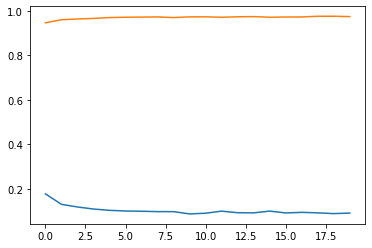

In [23]:
#Gráfico para visualizar os erros e accuracy
historico.history.keys()
#evolução do erro
plt.plot(historico.history['val_loss'])
#performance da rede
plt.plot(historico.history['val_accuracy'])

#### Previsões

In [24]:
#obtenção das previsões
previsoes = modelo.predict(X_teste)

In [26]:
#valor máximo (com a probabilidade maior por serem 10 saídas) e geração da matriz de confusão
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)

In [27]:
#numero a ser previsto (4)
y_treinamento[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [29]:
#previsão do numero anterior
novo = X_treinamento[20]
novo = np.expand_dims(novo, axis=0)
pred = modelo.predict(novo)
pred=[np.argmax(pred) for t in pred]
pred

[4]